# ML Foreclosure Binary Classification -30k "Constructed Training Data"

    target = zeroBalCode (set to object dtype) 
    Binary classification sets zeroBalCode to either "0" or "1" for the 7 possible outcomes
    
    "0" = "Loan Success"
        * 01 = Prepaid or Matured

    "1" =  "Loan Failure" - Most likely loss of money (but not necessarily) one of below conditions:
        * 02 = Third Party Sale
        * 03 = Short Sale
        * 06 = Repurchased
        * 09 = Deed-in-Lieu,REO
        * 15 = Note Sale
        * 16 = Reperforming Loan Sale
        
     Constructed "Oversampled data" :
         Data was split into:
             "Test"     2014-2019
             "Train"    2000-2013
             
             "Train" was split on zeroBalCode into:
                 "Success" (0)
                 "Foreclosure" (1) 
                 
                 30k was randomly sampled from each then combined to get "oversampled Foreclosure data"
                 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#!pip install pycaret
from imblearn.over_sampling import RandomOverSampler
from pycaret.classification import *
#from pycaret.regression import *

# Importing the data - only use *.ML.csv files!!!
If you have *.MLReady.csv then [click here](#MLReady)

In [2]:
df=pd.read_csv("data/FM_Acq_Perf_FMAC_ML.csv")
df.head()

,Unnamed: 0,id,origChannel,origIntRate,origUPB,origDate,firstPmtDate,origLTV,numBorrowers,origDebtIncRatio,...,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct
0,0,100094030068,3,7.75,152000,1999-11-01,2000-01-01,85.0,1.0,41.0,...,7.67,7.7375,0.022164,6.06,-0.09,-0.08,0.0125,-0.011480,-0.010430,0.001616
1,1,100118647578,2,7.75,106000,1999-11-01,2000-01-01,80.0,2.0,27.0,...,7.67,7.7375,0.022164,6.06,-0.09,-0.08,0.0125,-0.011480,-0.010430,0.001616
2,2,100687390672,1,8.00,120000,1999-11-01,2000-01-01,77.0,1.0,54.0,...,7.67,7.7375,0.022164,6.06,0.16,-0.33,0.2625,0.020408,-0.043025,0.033926
3,3,102134561765,2,8.50,206000,1999-11-01,2000-01-01,80.0,1.0,35.0,...,7.67,7.7375,0.022164,6.06,0.66,-0.83,0.7625,0.084184,-0.108214,0.098546
4,4,102389202525,1,7.75,140000,1999-11-01,2000-01-01,78.0,2.0,49.0,...,7.67,7.7375,0.022164,6.06,-0.09,-0.08,0.0125,-0.011480,-0.010430,0.001616


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300554 entries, 0 to 1300553
Data columns (total 59 columns):
Unnamed: 0                    1300554 non-null int64
id                            1300554 non-null int64
origChannel                   1300554 non-null int64
origIntRate                   1300554 non-null float64
origUPB                       1300554 non-null int64
origDate                      1300554 non-null object
firstPmtDate                  1300554 non-null object
origLTV                       1300554 non-null float64
numBorrowers                  1300554 non-null float64
origDebtIncRatio              1300554 non-null float64
borrCreditScore               1300554 non-null float64
loanPurp                      1300554 non-null int64
zipCode                       1300554 non-null int64
pMIperct                      1300554 non-null float64
mortInsType                   1300554 non-null float64
bestCreditScore               1300554 non-null float64
worstCreditScore     

## Remove columns not involved in 'Foreclosure or Not' query

In [4]:
df.drop(['Unnamed: 0','id','firstPmtDate','rptPeriod','currIntRate','currUPB','loanAge','monMatur',\
         'zeroBalDate','lastPdInstDate','forecloDate','dispDate','forecloCost','propRepCost','recovCosts',\
         'miscCost','holdTaxCost','saleProceed','credEnhProceed','repurchProceed','otherForecloProceed',\
         'nonIntUPB','prinForgivBal','repurchMakeWholeProceedFlg','forecloPrinWriteOffAmnt','servActivIndicator',\
         'deliqGood','deliqBad','deliqMax'],1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300554 entries, 0 to 1300553
Data columns (total 30 columns):
origChannel           1300554 non-null int64
origIntRate           1300554 non-null float64
origUPB               1300554 non-null int64
origDate              1300554 non-null object
origLTV               1300554 non-null float64
numBorrowers          1300554 non-null float64
origDebtIncRatio      1300554 non-null float64
borrCreditScore       1300554 non-null float64
loanPurp              1300554 non-null int64
zipCode               1300554 non-null int64
pMIperct              1300554 non-null float64
mortInsType           1300554 non-null float64
bestCreditScore       1300554 non-null float64
worstCreditScore      1300554 non-null float64
avgCreditScore        1300554 non-null float64
bankNumber            1300554 non-null int64
stateNumber           1300554 non-null int64
mSA                   1300554 non-null int64
zeroBalCode           1300554 non-null float64
fmacRateM

## Engineer originDate into Date features

In [6]:
df['origDate'] = pd.to_datetime(df['origDate'])

In [7]:
df['origYear'] = df['origDate'].dt.year
df['origMonth'] = df['origDate'].dt.month

In [8]:
df.drop(['origDate'],1,inplace=True)

In [9]:
df[['origYear','origMonth']].tail()

,origYear,origMonth
1300549,2019,3
1300550,2019,3
1300551,2019,3
1300552,2019,3
1300553,2019,3


# Turn zero Balance Code Into binary "0" GOOD and "1" BAD

In [10]:
df.zeroBalCode.value_counts()

1.0     1014859
9.0      173305
3.0       38358
16.0      27689
2.0       18973
15.0      13843
6.0       13527
Name: zeroBalCode, dtype: int64

In [11]:
df.zeroBalCode.unique()

array([ 1.,  9.,  6.,  2.,  3., 16., 15.])

In [12]:
df['zeroBalCode'] = df.zeroBalCode.replace(1,0)
df['zeroBalCode'] = df.zeroBalCode.replace([9,3,16,6,2,15],1)

In [13]:
df.zeroBalCode.unique()

array([0., 1.])

In [14]:
#Checking datatypes of individual feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300554 entries, 0 to 1300553
Data columns (total 31 columns):
origChannel           1300554 non-null int64
origIntRate           1300554 non-null float64
origUPB               1300554 non-null int64
origLTV               1300554 non-null float64
numBorrowers          1300554 non-null float64
origDebtIncRatio      1300554 non-null float64
borrCreditScore       1300554 non-null float64
loanPurp              1300554 non-null int64
zipCode               1300554 non-null int64
pMIperct              1300554 non-null float64
mortInsType           1300554 non-null float64
bestCreditScore       1300554 non-null float64
worstCreditScore      1300554 non-null float64
avgCreditScore        1300554 non-null float64
bankNumber            1300554 non-null int64
stateNumber           1300554 non-null int64
mSA                   1300554 non-null int64
zeroBalCode           1300554 non-null float64
fmacRateMax           1300554 non-null float64
fmacRate

# Review values for dates and slice (if needed) the timeframe you want

In [15]:
df.origYear.unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [16]:
sorted(df['origMonth'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Coerce the column dtype (int in this case)

In [17]:
df = df.astype({'origLTV':'int','numBorrowers':'int','origDebtIncRatio':'int',\
               'borrCreditScore':'int','mortInsType':'int','bestCreditScore':'int',\
               'worstCreditScore':'int','avgCreditScore':'int','zeroBalCode':'int'})
#,'zeroBalCode':'int'

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300554 entries, 0 to 1300553
Data columns (total 31 columns):
origChannel           1300554 non-null int64
origIntRate           1300554 non-null float64
origUPB               1300554 non-null int64
origLTV               1300554 non-null int32
numBorrowers          1300554 non-null int32
origDebtIncRatio      1300554 non-null int32
borrCreditScore       1300554 non-null int32
loanPurp              1300554 non-null int64
zipCode               1300554 non-null int64
pMIperct              1300554 non-null float64
mortInsType           1300554 non-null int32
bestCreditScore       1300554 non-null int32
worstCreditScore      1300554 non-null int32
avgCreditScore        1300554 non-null int32
bankNumber            1300554 non-null int64
stateNumber           1300554 non-null int64
mSA                   1300554 non-null int64
zeroBalCode           1300554 non-null int32
fmacRateMax           1300554 non-null float64
fmacRateMin           1300

<a id='MLReady'></a>

<a id='MLReady'></a>
## *MLReady.csv file loading point
uncomment one of the boxes below

In [19]:
#df.to_csv('D:\FM_FULL_EPOCH3_MLReady.csv')

In [20]:
#df = pd.read_csv('D:\FM_FULL_EPOCH2_MLReady.csv')

## Separate out ~20% as "Test data"

In [21]:
df.shape

(1300554, 31)

In [22]:
test_df = df[df['origYear'] > 2013]

In [23]:
test_df.shape

(33785, 31)

In [24]:
good = test_df.zeroBalCode.value_counts()[0]
bad = test_df.zeroBalCode.value_counts()[1]
perct_bad = round(bad/(good+bad)*100,2)
print(f'{test_df.zeroBalCode.value_counts()}')
print(f'We have {perct_bad}% Foreclosures in our dataset')

0    31950
1     1835
Name: zeroBalCode, dtype: int64
We have 5.43% Foreclosures in our dataset


In [25]:
test_df.to_csv('data/FM_TEST_13-19.csv')

In [26]:
df = df[df['origYear'] <= 2013]

In [27]:
df.shape

(1266769, 31)

In [28]:
good = df.zeroBalCode.value_counts()[0]
bad = df.zeroBalCode.value_counts()[1]
perct_bad = round(bad/(good+bad)*100,2)
print(f'{df.zeroBalCode.value_counts()}')
print(f'We have {perct_bad}% Foreclosures in our dataset')

0    982909
1    283860
Name: zeroBalCode, dtype: int64
We have 22.41% Foreclosures in our dataset


## Split remaining Training data into 'Forclo' & 'Success'
Then we will constructed a random selection from each for the same number of rows to create a 50/50 class split

### Create 'Foreclosure only' slice df

In [29]:
forclo_df = df[df['zeroBalCode'] == 1]

In [30]:
forclo_df.shape

(283860, 31)

In [31]:
forclo_df.to_csv('data/FM_FULL_FORECLO_ONLY.csv')

### Create 'Succes only' slice df

In [32]:
success_df = df[df['zeroBalCode'] == 0]

In [33]:
success_df.shape

(982909, 31)

In [34]:
success_df.to_csv('data/FM_FULL_SUCCESS_ONLY.csv')

### Randomly Sample each df separately then combine

In [58]:
successSample30_df = success_df.sample(n = 30000, random_state = 9)

In [59]:
forcloSample30_df = forclo_df.sample(n = 30000, random_state = 9)

In [60]:
df = pd.concat([forcloSample30_df,successSample30_df])

In [61]:
df.zeroBalCode.value_counts()

1    30000
0    30000
Name: zeroBalCode, dtype: int64

In [62]:
good = df.zeroBalCode.value_counts()[0]
bad = df.zeroBalCode.value_counts()[1]
perct_bad = round(bad/(good+bad)*100,2)
print(f'{df.zeroBalCode.value_counts()}')
print(f'We have {perct_bad}% Foreclosures in our dataset')

1    30000
0    30000
Name: zeroBalCode, dtype: int64
We have 50.0% Foreclosures in our dataset


In [63]:
# from sklearn.model_selection import train_test_split

# training_features, test_features, \
# training_target, test_target, = train_test_split(
#     df.drop(['zeroBalCode'], axis=1)
#     , df['zeroBalCode']
#     , test_size = .1
#     , random_state=12
# )

In [64]:
# # Further split the training data into training/test
# x_train, x_val, y_train, y_val = train_test_split(
#     training_features
#     , training_target
#     , test_size = .1
#     ,random_state=12
# )

In [65]:
# # For the training data, randomly sample 
# ros = RandomOverSampler(sampling_strategy='minority')
# x_train_res, y_train_res = ros.fit_sample(x_train, y_train)

In [66]:
# print('#############################################')
# print('Before oversampling: "Closed" crushes "Default" and causes issues:')
# print(training_target.value_counts())
# print('')
# print('Before oversampling: "Closed" and "Default" are equal')
# print(y_train_res.value_counts())

# Recombine X_train_res, y_train_res so PyCaret can deal with one df

In [67]:
# y_train_res.shape

In [68]:
# df = x_train_res.copy()

In [69]:
# df['zeroBalCode'] = y_train_res

In [70]:
# df.shape

# Review metrics last time before run (to have record of starting values)

In [72]:
pd.set_option('max_columns',None)
df.head()

,origChannel,origIntRate,origUPB,origLTV,numBorrowers,origDebtIncRatio,borrCreditScore,loanPurp,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,bankNumber,stateNumber,mSA,zeroBalCode,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth
117061,2,7.375,95000,86,1,29,672,2,477,17.0,1,672,672,672,26,16,21780,1,7.24,7.11,7.1600,0.018284,5.39,0.135,-0.265,0.2150,0.018646,-0.037271,0.030028,2001,6
782997,2,5.625,352000,70,1,64,733,1,945,0.0,0,733,733,733,4,4,41860,1,5.77,5.62,5.6950,0.026690,4.06,-0.145,-0.005,-0.0700,-0.025130,-0.000890,-0.012291,2005,7
1014775,1,6.750,86000,66,1,56,669,1,871,0.0,0,669,669,669,12,33,10740,1,6.68,6.45,6.5720,0.035659,4.76,0.070,-0.300,0.1780,0.010479,-0.046512,0.027085,2007,8
862787,3,6.375,216000,80,1,42,670,1,501,0.0,0,670,670,670,80,13,19780,1,6.58,6.43,6.5075,0.023328,4.86,-0.205,0.055,-0.1325,-0.031155,0.008554,-0.020361,2006,4
867751,3,6.250,390000,70,2,27,703,1,108,0.0,0,722,703,712,15,35,35620,1,6.62,6.58,6.5975,0.006079,5.14,-0.370,0.330,-0.3475,-0.055891,0.050152,-0.052671,2006,5


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 117061 to 249360
Data columns (total 31 columns):
origChannel           60000 non-null int64
origIntRate           60000 non-null float64
origUPB               60000 non-null int64
origLTV               60000 non-null int32
numBorrowers          60000 non-null int32
origDebtIncRatio      60000 non-null int32
borrCreditScore       60000 non-null int32
loanPurp              60000 non-null int64
zipCode               60000 non-null int64
pMIperct              60000 non-null float64
mortInsType           60000 non-null int32
bestCreditScore       60000 non-null int32
worstCreditScore      60000 non-null int32
avgCreditScore        60000 non-null int32
bankNumber            60000 non-null int64
stateNumber           60000 non-null int64
mSA                   60000 non-null int64
zeroBalCode           60000 non-null int32
fmacRateMax           60000 non-null float64
fmacRateMin           60000 non-null float64
fmacRateAvg      

# Pycaret - Setup with categorical definition

### Use complex setup 

In [74]:
model_setup = setup(
    df
    , target = 'zeroBalCode' # PyCaret will list this as "Label"
    , pca = False 
    , ignore_low_variance = True # Variance is calculated using the ratio of unique values to the number of samples, and the ratio of the most common value to the frequency of the second most common value.
    , normalize = True
    , ignore_features = None
    , handle_unknown_categorical = True
    , remove_outliers = True # outliers from the training data are removed using PCA linear dimensionality reduction using the Singular Value Decomposition technique.
    , bin_numeric_features = [
            'origIntRate'
            , 'origUPB'
            , 'origLTV'
            , 'origDebtIncRatio'
            , 'bestCreditScore'
            , 'avgCreditScore'
            , 'worstCreditScore'
        ] # Set to True to bin numerics using K Means
    , feature_selection = True
    , silent = True
    , profile = False
    , categorical_features = [
            'origChannel'
            , 'numBorrowers'
            , 'loanPurp'
            , 'zipCode'
            , 'bankNumber'
            , 'stateNumber'
            , 'origYear'
            , 'origMonth'
            , 'mSA'
        ]
        , numeric_features = [
            'origIntRate'
            , 'origUPB'
            , 'origLTV'
            , 'pMIperct'
            , 'origDebtIncRatio'
            , 'worstCreditScore'
            , 'bestCreditScore'
            , 'avgCreditScore'
            , 'rateDiffAbove'
            , 'rateDiffBelow'
            , 'rateDiffAvg'
            , 'rateDiffAbovePct'
            , 'rateDiffBelowPct'
            , 'rateDiffAvgPct'
        ]
)


 
Setup Succesfully Completed!


,Description,Value
0,session_id,2334
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(60000, 31)"
4,Missing Values,False
5,Numeric Features,21
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Compare Models with no blacklist exclusions

In [75]:
model_results=compare_models() #blacklist = ['tr','ransac'],'lar','par','huber','llar','lasso','en','ridge','omp','br','svm'])
model_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.7263,0.7988,0.7522,0.7167,0.7339,0.4526
1,Light Gradient Boosting Machine,0.7244,0.7983,0.7578,0.7118,0.7341,0.4487
2,Logistic Regression,0.7216,0.7917,0.7422,0.7144,0.728,0.4431
3,Ridge Classifier,0.7206,0,0.7432,0.7126,0.7275,0.4412
4,Linear Discriminant Analysis,0.7191,0.7869,0.7409,0.7114,0.7258,0.438
5,SVM - Linear Kernel,0.7162,0,0.7343,0.7115,0.7212,0.4322
6,Gradient Boosting Classifier,0.7157,0.7866,0.7296,0.7115,0.7204,0.4314
7,Extreme Gradient Boosting,0.7152,0.7858,0.7301,0.7106,0.7201,0.4304
8,Ada Boost Classifier,0.7147,0.7828,0.7314,0.7093,0.7201,0.4292
9,Extra Trees Classifier,0.7141,0.7811,0.7286,0.7096,0.7189,0.4281


## Create models 

### Extra Trees Classifier

In [76]:
et = create_model('et', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7353,0.7989,0.7495,0.7299,0.7396,0.4705
1,0.7024,0.7747,0.7228,0.6959,0.7091,0.4047
2,0.7196,0.7759,0.7478,0.7093,0.7280,0.4391
3,0.7231,0.7908,0.7278,0.7224,0.7251,0.4461
4,0.7049,0.7685,0.7197,0.7005,0.7100,0.4097
5,0.7058,0.7694,0.7097,0.7058,0.7077,0.4116
6,0.7133,0.7788,0.7247,0.7101,0.7173,0.4266
7,0.6967,0.7714,0.7241,0.6880,0.7056,0.3934
8,0.7190,0.7885,0.7347,0.7138,0.7241,0.4379
9,0.7205,0.7942,0.7245,0.7200,0.7223,0.4409


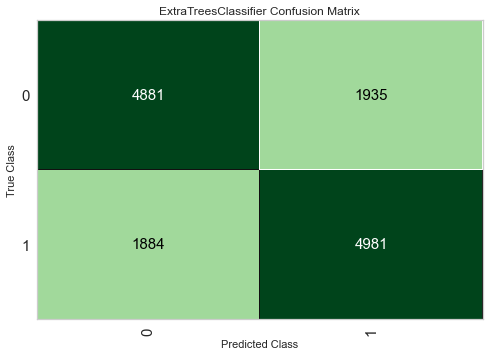

In [77]:
plot_model(et, plot = 'confusion_matrix')

### Extra Trees Classifier just guessed everything beyond belief really

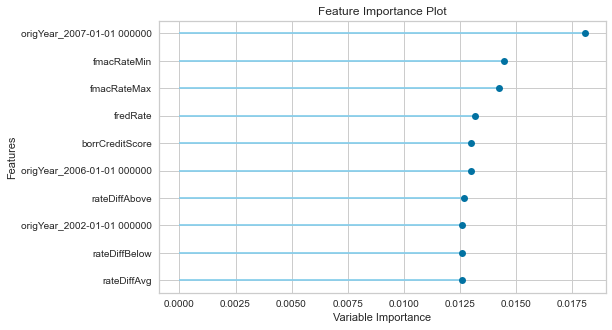

In [78]:
plot_model(et, plot = 'feature')

#### CatBoost

In [145]:
catboost =create_model('catboost', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7362,0.8145,0.7626,0.7255,0.7436,0.4723
1,0.7309,0.7958,0.7653,0.7174,0.7406,0.4616
2,0.7187,0.7948,0.7503,0.7071,0.7280,0.4372
3,0.7293,0.8039,0.7397,0.7261,0.7328,0.4586
4,0.7237,0.7901,0.7509,0.7135,0.7318,0.4473
5,0.7268,0.7915,0.7397,0.7226,0.7310,0.4536
6,0.7190,0.7956,0.7416,0.7110,0.7259,0.4379
7,0.7052,0.7839,0.7378,0.6941,0.7153,0.4103
8,0.7274,0.8048,0.7615,0.7143,0.7372,0.4547
9,0.7462,0.8136,0.7720,0.7353,0.7532,0.4922


#### Light Gradient Boosting Machine (lgbm)

In [80]:
lightgbm = create_model('lightgbm', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7312,0.8115,0.7695,0.7159,0.7417,0.4623
1,0.7237,0.7940,0.7615,0.7093,0.7345,0.4472
2,0.7237,0.7974,0.7628,0.7088,0.7348,0.4472
3,0.7296,0.8068,0.7484,0.7227,0.7354,0.4592
4,0.7218,0.7859,0.7553,0.7093,0.7316,0.4435
5,0.7168,0.7873,0.7416,0.7080,0.7244,0.4335
6,0.7271,0.7980,0.7528,0.7174,0.7347,0.4542
7,0.7027,0.7826,0.7459,0.6880,0.7158,0.4052
8,0.7312,0.8084,0.7678,0.7168,0.7414,0.4623
9,0.7364,0.8113,0.7726,0.7217,0.7463,0.4728


## Tune Models

#### Tuned Light GBM

In [81]:
tuned_lightgbm = tune_model('lightgbm') # fold=10

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7321,0.8022,0.7570,0.7223,0.7392,0.4642
1,0.7231,0.7869,0.7566,0.7104,0.7328,0.4460
2,0.7143,0.7891,0.7409,0.7049,0.7225,0.4285
3,0.7218,0.7956,0.7447,0.7135,0.7288,0.4435
4,0.7083,0.7765,0.7316,0.7005,0.7157,0.4166
5,0.7052,0.7770,0.7185,0.7014,0.7098,0.4103
6,0.7124,0.7882,0.7335,0.7053,0.7191,0.4247
7,0.6980,0.7688,0.7247,0.6894,0.7066,0.3959
8,0.7243,0.7992,0.7534,0.7134,0.7328,0.4485
9,0.7308,0.8039,0.7564,0.7208,0.7382,0.4615


### Tuned LigthGBM had declines on all metrics!!
#### Improved:  
#### Declined: Accuracy AUC   Recall    Precision F1   Kappa
                    Accuracy	 AUC	 Recall	 Prec.	  F1	    Kappa
    Untuned:  Mean	0.7244	0.7983	0.7578	0.7118	0.7341	0.4487
    Tuned:    Mean	0.7170	0.7887	0.7417	0.7082	0.7246	0.4340

In [158]:
optimize_threshold(lightgbm, true_negative =1500, false_negative = -5000)

Optimized Probability Threshold: 0.25 | Optimized Cost Function: 2179000


In [159]:
calibrated_lgbm = calibrate_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7353,0.8131,0.7683,0.7218,0.7443,0.4704
1,0.7227,0.7948,0.7578,0.7095,0.7329,0.4453
2,0.7306,0.7984,0.7640,0.7175,0.7400,0.4610
3,0.7278,0.8076,0.7434,0.7223,0.7327,0.4554
4,0.7218,0.7888,0.7484,0.7120,0.7298,0.4435
5,0.7165,0.7885,0.7322,0.7113,0.7216,0.4329
6,0.7271,0.7984,0.7472,0.7198,0.7332,0.4542
7,0.6967,0.7838,0.7303,0.6858,0.7074,0.3933
8,0.7287,0.8082,0.7615,0.7160,0.7381,0.4573
9,0.7339,0.8120,0.7626,0.7225,0.7420,0.4678


In [160]:
final_lgbm = finalize_model(calibrated_lgbm)

### Tuned CatBoost

In [184]:
tuned_catboost = tune_model('catboost') 

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7390,0.8150,0.7620,0.7297,0.7455,0.4780
1,0.7227,0.7944,0.7603,0.7086,0.7335,0.4453
2,0.7187,0.7918,0.7509,0.7068,0.7282,0.4372
3,0.7318,0.8052,0.7441,0.7277,0.7358,0.4636
4,0.7177,0.7874,0.7385,0.7105,0.7242,0.4354
5,0.7215,0.7915,0.7422,0.7141,0.7279,0.4429
6,0.7243,0.7954,0.7484,0.7154,0.7315,0.4485
7,0.7052,0.7828,0.7378,0.6941,0.7153,0.4103
8,0.7253,0.8024,0.7541,0.7144,0.7337,0.4504
9,0.7374,0.8097,0.7726,0.7230,0.7470,0.4746


### CatBoost had declines on all metrics!!
#### Improved:  
#### Declined:   Accuracy AUC   Recall    Precision F1   Kappa  
                    Accuracy	 AUC	 Recall	 Prec.	  F1	    Kappa
    Untuned:  Mean	0.7263	0.7988	0.7522	0.7167	0.7339	0.4526
    Tuned:    Mean	0.7244	0.7975	0.7511	0.7144	0.7323	0.4486
    
 So we will keep the catboost model

In [186]:
optimize_threshold(tuned_catboost, true_negative =100, false_negative = -5000)

Optimized Probability Threshold: 0.08 | Optimized Cost Function: 23200


In [188]:
final_catboost = finalize_model(catboost)

# Evaluate Models

## Light GBM ("Fast Set" - some plots take longer and they are commented out

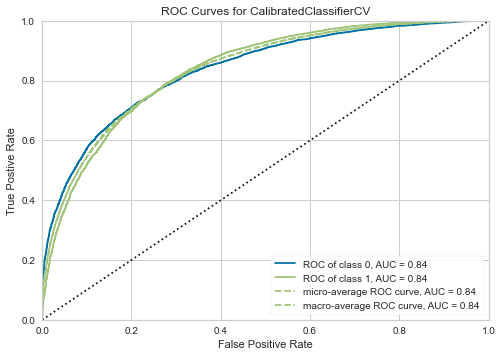

In [161]:
plot_model(final_lgbm) #Super Fast

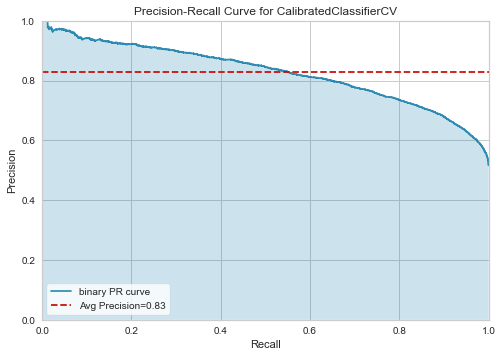

In [163]:
plot_model(final_lgbm, plot = 'pr')  #Super Fast

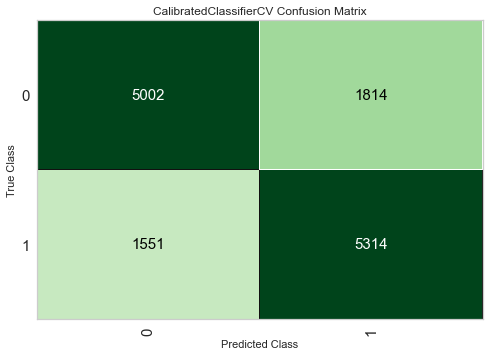

In [164]:
plot_model(final_lgbm, plot='confusion_matrix') #Super Fast

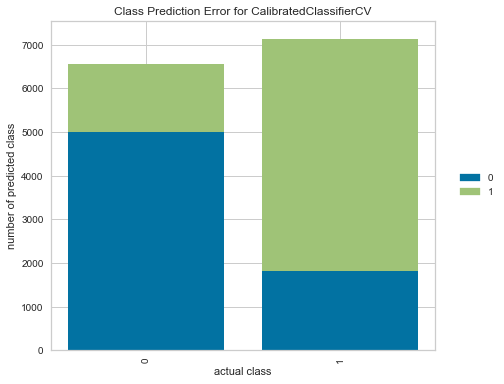

In [165]:
plot_model(final_lgbm, plot = 'error') #Super Fast

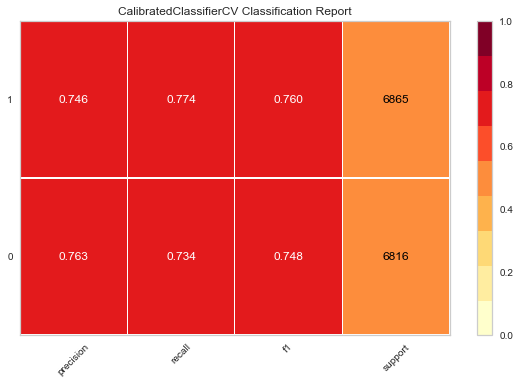

In [166]:
plot_model(final_lgbm, plot = 'class_report') #Super Fast

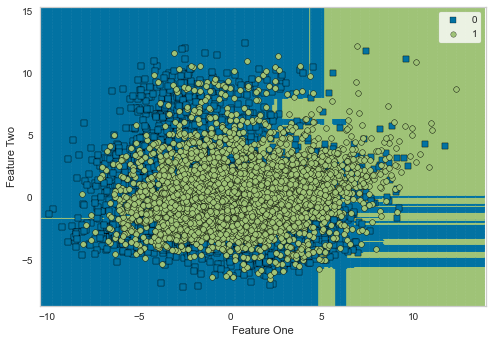

In [167]:
plot_model(final_lgbm, plot = 'boundary') #Super Fast

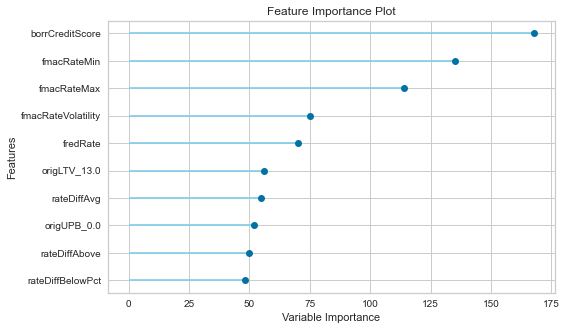

In [193]:
plot_model(lightgbm, plot = 'feature') #Super Fast

In [191]:
plot_model(final_lgbm, plot = 'parameter') #Super Fast

,Parameters
base_estimator__boosting_type,gbdt
base_estimator__class_weight,None
base_estimator__colsample_bytree,1
base_estimator__importance_type,split
base_estimator__learning_rate,0.1
base_estimator__max_depth,-1
base_estimator__min_child_samples,20
base_estimator__min_child_weight,0.001
base_estimator__min_split_gain,0
base_estimator__n_estimators,100


## Extra Trees Classifier ("Fast Set" - some plots take longer and they are commented out

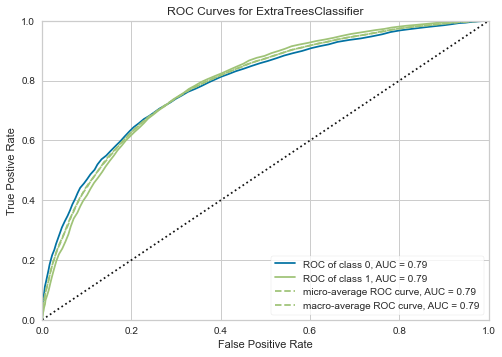

In [91]:
plot_model(et) #Super Fast

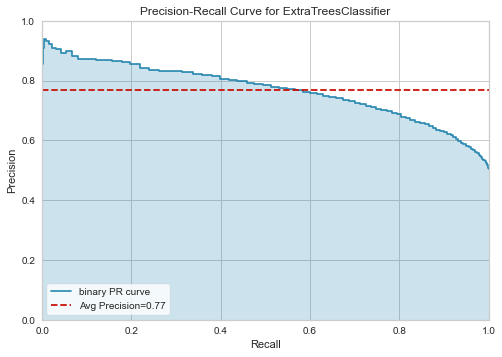

In [93]:
plot_model(et, plot = 'pr')  #Super Fast

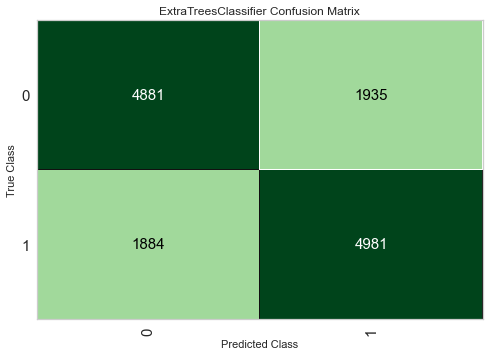

In [94]:
plot_model(et, plot='confusion_matrix') #Super Fast

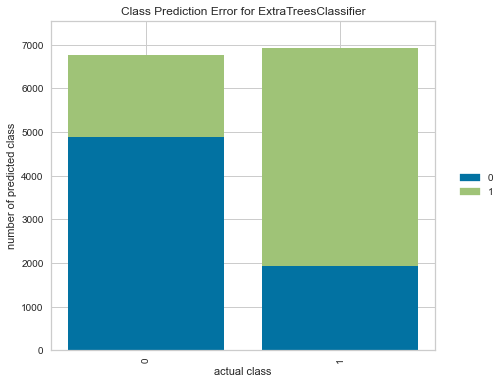

In [95]:
plot_model(et, plot = 'error') #Super Fast

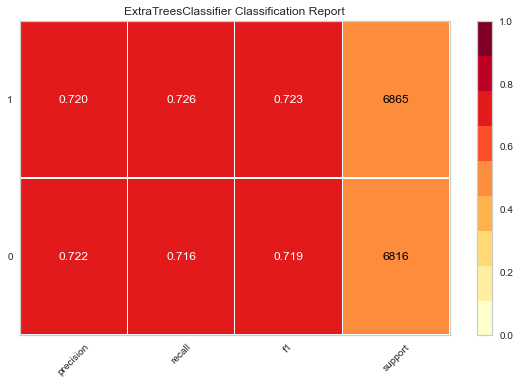

In [96]:
plot_model(et, plot = 'class_report') #Super Fast

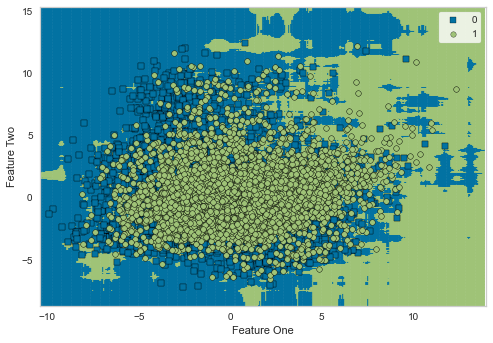

In [97]:
plot_model(et, plot = 'boundary') #Super Fast

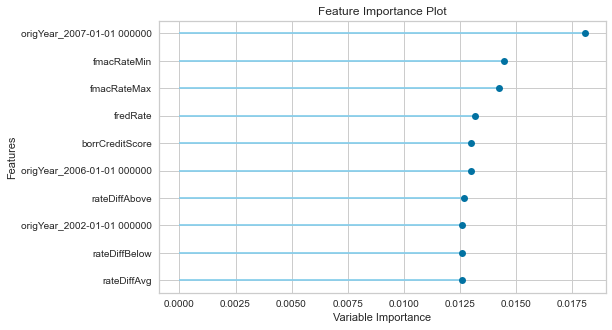

In [102]:
plot_model(et, plot = 'feature') #Super Fast

In [103]:
plot_model(et, plot = 'parameter') #Super Fast

,Parameters
bootstrap,False
ccp_alpha,0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None


# Interpret Models

## Catboost (can't use plot_model for Catboost so we use interpret_model

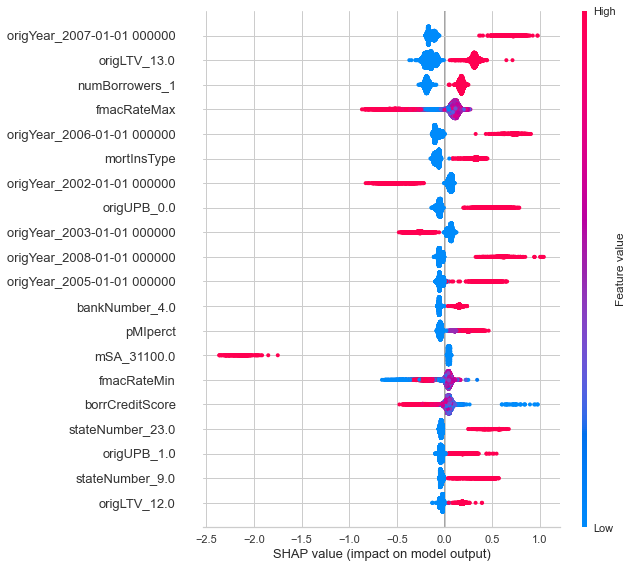

In [195]:
interpret_model(catboost) #Super Fast

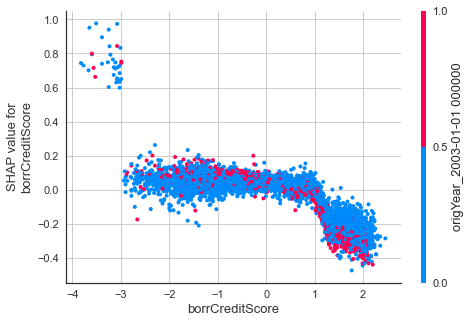

In [196]:
interpret_model(catboost, plot = 'correlation', feature='borrCreditScore')  #Super Fast

# Predict models using the "Oversampled" test holdout within PyCaret
## This is the "Validation step" using the internally split Training data
Can't use the final_model output here since it includes the "Train hold out data"

#### CatBoost

In [225]:
pred_holdout = predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.733,0.8094,0.7458,0.7285,0.7371,0.4659


#### Tuned CatBoost

In [232]:
pred_holdout_tuned = predict_model(tuned_catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.7342,0.8074,0.7473,0.7296,0.7383,0.4684


### CatBoost had declines on all metrics!!
#### Improved:  
#### Declined:   Accuracy AUC   Recall    Precision F1   Kappa  
                    Accuracy	 AUC	 Recall	 Prec.	  F1	    Kappa
    Untuned:     Mean	0.7263	0.7988	0.7522	0.7167	0.7339	0.4526
    Validate:    Mean	0.733	0.8094	0.7458	0.7285	0.7371	0.4659
    
 These are in good agreement 

#### Light GBM

In [227]:
pred_holdout = predict_model(lightgbm) # this was run BEFORE the finalize_model()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.7301,0.8074,0.7548,0.7206,0.7373,0.4602


#### Tuned Light GBM

In [228]:
pred_holdout_tuned = predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.726,0.7994,0.7444,0.7194,0.7317,0.452


### LigthGBM had declines on all metrics!!
#### Improved:  
#### Declined: Accuracy AUC   Recall    Precision F1   Kappa
                    Accuracy	 AUC	 Recall	 Prec.	  F1	    Kappa
    Untuned:     Mean	0.7244	0.7983	0.7578	0.7118	0.7341	0.4487
    Validate:    Mean	0.7301	0.8074	0.7548	0.7206	0.7373	0.4602
    
  These are in good agreement

#### Extra Trees Classifier

In [229]:
pred_holdout_tuned = predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.7209,0.7909,0.7256,0.7202,0.7229,0.4417


# The golden moment... put 10% sample test data through the models...

# Bring back the test_df from the earlier train/test/split
 This "test" set was split BEFORE Constructed Oversampling. PyCaret takes the "train" from this split and splits it internally again. Since we have no control of how PyCaret does this we needed to do a train/test split before we input the training set into PyCaret. Now we will use this test_df in our models to see how well they perform

In [233]:
test_df.shape

(33785, 31)

In [234]:
totalTestCount = test_df.zeroBalCode.value_counts().sum()
posTestCount = test_df.zeroBalCode.value_counts()[1]
print('#############################################')
print('This "Test" set has not been oversamplied')
print(test_df.zeroBalCode.value_counts())
print(f'Positive samples are {round(posTestCount/totalTestCount*100,2)}%')

#############################################
This "Test" set has not been oversamplied
0    31950
1     1835
Name: zeroBalCode, dtype: int64
Positive samples are 5.43%


### Make function to easily create Confusion Matrix information scoring

In [132]:
def calc_confusion(row):
    if ((row['zeroBalCode'] == 0) & (row['Label'] == 0)):
        value = 'TrueNegative'
    elif ((row['zeroBalCode'] == 0) & (row['Label'] == 1)):
        value = 'FalseNegative'
    elif ((row['zeroBalCode'] == 1) & (row['Label'] == 1)):
        value = 'TruePositive'
    elif ((row['zeroBalCode'] == 1) & (row['Label'] == 0)):
        value = 'FalsePositive'
    else:
        value = 'Undefined'
    return value

# Catboost using "Test" data to do final evaluation

In [235]:
predictions = predict_model(final_catboost, data=test_df)

In [236]:
pd.set_option('max_columns',None)
predictions.head()

,origChannel,origIntRate,origUPB,origLTV,numBorrowers,origDebtIncRatio,borrCreditScore,loanPurp,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,bankNumber,stateNumber,mSA,zeroBalCode,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth,Label,Score
0,1,5.00,319000,85,1,37,684,2,82,12.0,1,684,684,684,54,32,36140,1,4.53,4.32,4.432,0.048611,3.04,0.47,-0.68,0.568,0.103753,-0.157407,0.128159,2014,1,0,0.4648
1,1,4.50,298000,72,1,43,670,2,76,0.0,0,670,670,670,54,32,35620,0,4.53,4.32,4.432,0.048611,3.04,-0.03,-0.18,0.068,-0.006623,-0.041667,0.015343,2014,1,0,0.3118
2,1,4.50,184000,80,1,45,698,2,631,0.0,0,698,698,698,54,25,41180,0,4.53,4.32,4.432,0.048611,3.04,-0.03,-0.18,0.068,-0.006623,-0.041667,0.015343,2014,1,0,0.3928
3,1,4.75,320000,66,2,43,686,1,921,0.0,0,690,686,688,54,4,41740,0,4.53,4.32,4.432,0.048611,3.04,0.22,-0.43,0.318,0.048565,-0.099537,0.071751,2014,1,0,0.2491
4,1,4.75,200000,76,1,44,694,1,150,0.0,0,694,694,694,54,39,38300,0,4.53,4.32,4.432,0.048611,3.04,0.22,-0.43,0.318,0.048565,-0.099537,0.071751,2014,1,0,0.4739


In [237]:
results = predictions[['zeroBalCode','Label','Score']]

In [238]:
predictions.Label.value_counts()

0    30972
1     2813
Name: Label, dtype: int64

In [240]:
results['Confusion'] = results.apply(calc_confusion, axis=1)

In [241]:
confusionMatrix = results.Confusion.value_counts().to_dict()

In [242]:
print(f'           ##############################')
print(f'           #             #              #')
print(f'         0 #    {confusionMatrix["TrueNegative"]}    #     {confusionMatrix["FalsePositive"]}     #')
print(f'  True     #             #              #')
print(f'  Class    ##############################')
print(f'           #             #              #')
print(f'         1 #    {confusionMatrix["FalseNegative"]}     #     {confusionMatrix["TruePositive"]}      #')
print(f'           #             #              #')
print(f'           ##############################')
print(f'                  0              1        ')
print(f'                  Predicted Class           ')
# 0 or 2 = Predict equals truth, 1 = Predict doesn't equal truth
totalNegative = confusionMatrix['TrueNegative'] + confusionMatrix['FalseNegative']
totalPositive = confusionMatrix['TruePositive'] + confusionMatrix['FalsePositive']
trueNegativePct = confusionMatrix['TrueNegative'] / totalNegative * 100
falseNegativePct = confusionMatrix['FalseNegative'] / totalNegative * 100
truePositivePct = confusionMatrix['TruePositive'] / totalPositive * 100
falsePositivePct = confusionMatrix['FalsePositive'] / totalPositive * 100

print(f'              TrueNegative:  {round(trueNegativePct,2)}%')
print(f'              FalseNegative:  {round(falseNegativePct,2)}%')
print(f'              TruePosiive:   {round(truePositivePct,2)}%')
print(f'              FalsePositive: {round(falsePositivePct,2)}%')

           ##############################
           #             #              #
         0 #    29647    #     1325     #
  True     #             #              #
  Class    ##############################
           #             #              #
         1 #    2303     #     510      #
           #             #              #
           ##############################
                  0              1        
                  Predicted Class           
              TrueNegative:  92.79%
              FalseNegative:  7.21%
              TruePosiive:   27.79%
              FalsePositive: 72.21%


#### Well this is disappointing... The non-oversampled test dataset performed worse than random flipping a coin!

In [243]:
#save_model(final_catboost, 'catboost_Construct30k_052520')

# Light Gradient Boosting Machine

In [244]:
predictions = predict_model(final_lgbm, data=test_df)

In [245]:
pd.set_option('max_columns',None)
predictions.head()

,origChannel,origIntRate,origUPB,origLTV,numBorrowers,origDebtIncRatio,borrCreditScore,loanPurp,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,bankNumber,stateNumber,mSA,zeroBalCode,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth,Label,Score
0,1,5.00,319000,85,1,37,684,2,82,12.0,1,684,684,684,54,32,36140,1,4.53,4.32,4.432,0.048611,3.04,0.47,-0.68,0.568,0.103753,-0.157407,0.128159,2014,1,1,0.5327
1,1,4.50,298000,72,1,43,670,2,76,0.0,0,670,670,670,54,32,35620,0,4.53,4.32,4.432,0.048611,3.04,-0.03,-0.18,0.068,-0.006623,-0.041667,0.015343,2014,1,0,0.2900
2,1,4.50,184000,80,1,45,698,2,631,0.0,0,698,698,698,54,25,41180,0,4.53,4.32,4.432,0.048611,3.04,-0.03,-0.18,0.068,-0.006623,-0.041667,0.015343,2014,1,0,0.3347
3,1,4.75,320000,66,2,43,686,1,921,0.0,0,690,686,688,54,4,41740,0,4.53,4.32,4.432,0.048611,3.04,0.22,-0.43,0.318,0.048565,-0.099537,0.071751,2014,1,0,0.2061
4,1,4.75,200000,76,1,44,694,1,150,0.0,0,694,694,694,54,39,38300,0,4.53,4.32,4.432,0.048611,3.04,0.22,-0.43,0.318,0.048565,-0.099537,0.071751,2014,1,0,0.4513


In [246]:
results = predictions[['zeroBalCode','Label','Score']]

In [247]:
predictions.Label.value_counts()

0    30679
1     3106
Name: Label, dtype: int64

In [249]:
results['Confusion'] = results.apply(calc_confusion, axis=1)

In [250]:
confusionMatrix = results.Confusion.value_counts().to_dict()

In [251]:
print(f'           ##############################')
print(f'           #             #              #')
print(f'         0 #    {confusionMatrix["TrueNegative"]}     #     {confusionMatrix["FalsePositive"]}      #')
print(f'  True     #             #              #')
print(f'  Class    ##############################')
print(f'           #             #              #')
print(f'         1 #    {confusionMatrix["FalseNegative"]}     #     {confusionMatrix["TruePositive"]}      #')
print(f'           #             #              #')
print(f'           ##############################')
print(f'                  0              1        ')
print(f'                  Predicted Class           ')
# 0 or 2 = Predict equals truth, 1 = Predict doesn't equal truth
totalNegative = confusionMatrix['TrueNegative'] + confusionMatrix['FalseNegative']
totalPositive = confusionMatrix['TruePositive'] + confusionMatrix['FalsePositive']
trueNegativePct = confusionMatrix['TrueNegative'] / totalNegative * 100
falseNegativePct = confusionMatrix['FalseNegative'] / totalNegative * 100
truePositivePct = confusionMatrix['TruePositive'] / totalPositive * 100
falsePositivePct = confusionMatrix['FalsePositive'] / totalPositive * 100

print(f'              TrueNegative:  {round(trueNegativePct,2)}%')
print(f'              FalseNegative:  {round(falseNegativePct,2)}%')
print(f'              TruePosiive:   {round(truePositivePct,2)}%')
print(f'              FalsePositive: {round(falsePositivePct,2)}%')

           ##############################
           #             #              #
         0 #    29396     #     1283      #
  True     #             #              #
  Class    ##############################
           #             #              #
         1 #    2554     #     552      #
           #             #              #
           ##############################
                  0              1        
                  Predicted Class           
              TrueNegative:  92.01%
              FalseNegative:  7.99%
              TruePosiive:   30.08%
              FalsePositive: 69.92%


#### Well this is disappointing... The non-oversampled test dataset performed worse than random flipping a coin!

In [252]:
#save_model(final_lgbm, 'lgbm_Construct30k_052520')

Transformation Pipeline and Model Succesfully Saved


# Extra Trees Classifier

In [253]:
predictions = predict_model(et, data=test_df)

In [254]:
pd.set_option('max_columns',None)
predictions.head()

,origChannel,origIntRate,origUPB,origLTV,numBorrowers,origDebtIncRatio,borrCreditScore,loanPurp,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,bankNumber,stateNumber,mSA,zeroBalCode,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth,Label,Score
0,1,5.00,319000,85,1,37,684,2,82,12.0,1,684,684,684,54,32,36140,1,4.53,4.32,4.432,0.048611,3.04,0.47,-0.68,0.568,0.103753,-0.157407,0.128159,2014,1,1,0.59
1,1,4.50,298000,72,1,43,670,2,76,0.0,0,670,670,670,54,32,35620,0,4.53,4.32,4.432,0.048611,3.04,-0.03,-0.18,0.068,-0.006623,-0.041667,0.015343,2014,1,0,0.30
2,1,4.50,184000,80,1,45,698,2,631,0.0,0,698,698,698,54,25,41180,0,4.53,4.32,4.432,0.048611,3.04,-0.03,-0.18,0.068,-0.006623,-0.041667,0.015343,2014,1,0,0.32
3,1,4.75,320000,66,2,43,686,1,921,0.0,0,690,686,688,54,4,41740,0,4.53,4.32,4.432,0.048611,3.04,0.22,-0.43,0.318,0.048565,-0.099537,0.071751,2014,1,0,0.33
4,1,4.75,200000,76,1,44,694,1,150,0.0,0,694,694,694,54,39,38300,0,4.53,4.32,4.432,0.048611,3.04,0.22,-0.43,0.318,0.048565,-0.099537,0.071751,2014,1,0,0.43


In [255]:
results = predictions[['zeroBalCode','Label','Score']]

In [256]:
predictions.Label.value_counts()

0    30626
1     3159
Name: Label, dtype: int64

In [258]:
results['Confusion'] = results.apply(calc_confusion, axis=1)

In [259]:
confusionMatrix = results.Confusion.value_counts().to_dict()

In [260]:
print(f'           ##############################')
print(f'           #             #              #')
print(f'         0 #    {confusionMatrix["TrueNegative"]}    #     {confusionMatrix["FalsePositive"]}     #')
print(f'  True     #             #              #')
print(f'  Class    ##############################')
print(f'           #             #              #')
print(f'         1 #    {confusionMatrix["FalseNegative"]}     #     {confusionMatrix["TruePositive"]}      #')
print(f'           #             #              #')
print(f'           ##############################')
print(f'                  0              1        ')
print(f'                  Predicted Class           ')
# 0 or 2 = Predict equals truth, 1 = Predict doesn't equal truth
totalNegative = confusionMatrix['TrueNegative'] + confusionMatrix['FalseNegative']
totalPositive = confusionMatrix['TruePositive'] + confusionMatrix['FalsePositive']
trueNegativePct = confusionMatrix['TrueNegative'] / totalNegative * 100
falseNegativePct = confusionMatrix['FalseNegative'] / totalNegative * 100
truePositivePct = confusionMatrix['TruePositive'] / totalPositive * 100
falsePositivePct = confusionMatrix['FalsePositive'] / totalPositive * 100

print(f'              TrueNegative:  {round(trueNegativePct,2)}%')
print(f'              FalseNegative:  {round(falseNegativePct,2)}%')
print(f'              TruePosiive:   {round(truePositivePct,2)}%')
print(f'              FalsePositive: {round(falsePositivePct,2)}%')

           ##############################
           #             #              #
         0 #    29167    #     1459     #
  True     #             #              #
  Class    ##############################
           #             #              #
         1 #    2783     #     376      #
           #             #              #
           ##############################
                  0              1        
                  Predicted Class           
              TrueNegative:  91.29%
              FalseNegative:  8.71%
              TruePosiive:   20.49%
              FalsePositive: 79.51%


#### Well this is disappointing... The test dataset performed worse than random flipping a coin!

In [261]:
#save_model(et, 'et_Constructed30k_052520')